In [1]:
import pandas as pd
import numpy as np
import re
import mysql.connector
from sqlalchemy import create_engine

In [45]:
#Loading CSV
file = pd.read_csv("../Data/BooksDataset.csv")
file

,Title,Authors,Description,Category,Publisher,Publish Date,Price
0,Goat Brothers,"By Colton, Larry",NaN,"History , General",Doubleday,"Friday, January 1, 1993",Price Starting at $8.79
1,The Missing Person,"By Grumbach, Doris",NaN,"Fiction , General",Putnam Pub Group,"Sunday, March 1, 1981",Price Starting at $4.99
2,Don't Eat Your Heart Out Cookbook,"By Piscatella, Joseph C.",NaN,"Cooking , Reference",Workman Pub Co,"Thursday, September 1, 1983",Price Starting at $4.99
3,When Your Corporate Umbrella Begins to Leak: A...,"By Davis, Paul D.",NaN,NaN,Natl Pr Books,"Monday, April 1, 1991",Price Starting at $4.99
4,Amy Spangler's Breastfeeding : A Parent's Guide,"By Spangler, Amy",NaN,NaN,Amy Spangler,"Saturday, February 1, 1997",Price Starting at $5.32
...,...,...,...,...,...,...,...
103077,Build 3 Super Serving Carts,By Chuck Hampton,NaN,NaN,ENDesigns Inc.,"Wednesday, January 1, 1992",Price Starting at $9.97
103078,My Land of Israel,"By Nover, Elizabeth Z.",NaN,"Juvenile Nonfiction , People & Places , Middl...",Behrman House,"Friday, May 1, 1987",Price Starting at $4.99
103079,Tongues: To Speak or Not to Speak,By Donald W. Burdick,NaN,NaN,Moody Press,"Wednesday, January 1, 1969",Price Starting at $5.29
103080,If I'm in charge here why is everybody laughing?,"By Campbell, David P.",NaN,NaN,Argus Communications,"Tuesday, January 1, 1980",Price Starting at $4.99


# Data cleaning 

In [48]:
# --- First Name Extraction ---
def extract_first_name(author):
    if pd.isna(author):
        return np.nan
    
    # Remove common prefixes like "By", "By:"
    author = author.strip()
    author = re.sub(r'^(by:?\s+)', '', author, flags=re.IGNORECASE)
    
    if ',' in author:
        parts = author.split(',')
        if len(parts) > 1 and parts[1].strip():
            return parts[1].strip().split()[0]
    else:
        return author.strip().split()[0]

    return np.nan

In [49]:
file['First_Name'] = file['Authors'].apply(extract_first_name)

In [53]:
# Show a few rows that don't contain a comma
# file[~file['Authors'].str.contains(',', na=False)].head()

In [50]:
file

,Title,Authors,Description,Category,Publisher,Publish Date,Price,First_Name
0,Goat Brothers,"By Colton, Larry",NaN,"History , General",Doubleday,"Friday, January 1, 1993",Price Starting at $8.79,Larry
1,The Missing Person,"By Grumbach, Doris",NaN,"Fiction , General",Putnam Pub Group,"Sunday, March 1, 1981",Price Starting at $4.99,Doris
2,Don't Eat Your Heart Out Cookbook,"By Piscatella, Joseph C.",NaN,"Cooking , Reference",Workman Pub Co,"Thursday, September 1, 1983",Price Starting at $4.99,Joseph
3,When Your Corporate Umbrella Begins to Leak: A...,"By Davis, Paul D.",NaN,NaN,Natl Pr Books,"Monday, April 1, 1991",Price Starting at $4.99,Paul
4,Amy Spangler's Breastfeeding : A Parent's Guide,"By Spangler, Amy",NaN,NaN,Amy Spangler,"Saturday, February 1, 1997",Price Starting at $5.32,Amy
...,...,...,...,...,...,...,...,...
103077,Build 3 Super Serving Carts,By Chuck Hampton,NaN,NaN,ENDesigns Inc.,"Wednesday, January 1, 1992",Price Starting at $9.97,Chuck
103078,My Land of Israel,"By Nover, Elizabeth Z.",NaN,"Juvenile Nonfiction , People & Places , Middl...",Behrman House,"Friday, May 1, 1987",Price Starting at $4.99,Elizabeth
103079,Tongues: To Speak or Not to Speak,By Donald W. Burdick,NaN,NaN,Moody Press,"Wednesday, January 1, 1969",Price Starting at $5.29,Donald
103080,If I'm in charge here why is everybody laughing?,"By Campbell, David P.",NaN,NaN,Argus Communications,"Tuesday, January 1, 1980",Price Starting at $4.99,David


**Using a 3rd party name dictionary**

In [54]:
import gender_guesser.detector as gender

detector = gender.Detector()

def infer_gender(name):
    if pd.isna(name): return 'unknown'
    result = detector.get_gender(name)
    if result in ['male', 'mostly_male']:
        return 'male'
    elif result in ['female', 'mostly_female']:
        return 'female'
    else:
        return 'unknown'

In [55]:
file['Author_Gender'] = file['First_Name'].apply(infer_gender)

In [56]:
file

,Title,Authors,Description,Category,Publisher,Publish Date,Price,First_Name,Author_Gender
0,Goat Brothers,"By Colton, Larry",NaN,"History , General",Doubleday,"Friday, January 1, 1993",Price Starting at $8.79,Larry,male
1,The Missing Person,"By Grumbach, Doris",NaN,"Fiction , General",Putnam Pub Group,"Sunday, March 1, 1981",Price Starting at $4.99,Doris,female
2,Don't Eat Your Heart Out Cookbook,"By Piscatella, Joseph C.",NaN,"Cooking , Reference",Workman Pub Co,"Thursday, September 1, 1983",Price Starting at $4.99,Joseph,male
3,When Your Corporate Umbrella Begins to Leak: A...,"By Davis, Paul D.",NaN,NaN,Natl Pr Books,"Monday, April 1, 1991",Price Starting at $4.99,Paul,male
4,Amy Spangler's Breastfeeding : A Parent's Guide,"By Spangler, Amy",NaN,NaN,Amy Spangler,"Saturday, February 1, 1997",Price Starting at $5.32,Amy,female
...,...,...,...,...,...,...,...,...,...
103077,Build 3 Super Serving Carts,By Chuck Hampton,NaN,NaN,ENDesigns Inc.,"Wednesday, January 1, 1992",Price Starting at $9.97,Chuck,male
103078,My Land of Israel,"By Nover, Elizabeth Z.",NaN,"Juvenile Nonfiction , People & Places , Middl...",Behrman House,"Friday, May 1, 1987",Price Starting at $4.99,Elizabeth,female
103079,Tongues: To Speak or Not to Speak,By Donald W. Burdick,NaN,NaN,Moody Press,"Wednesday, January 1, 1969",Price Starting at $5.29,Donald,male
103080,If I'm in charge here why is everybody laughing?,"By Campbell, David P.",NaN,NaN,Argus Communications,"Tuesday, January 1, 1980",Price Starting at $4.99,David,male


In [57]:
# --- Price Cleaning ---
file['Cleaned_Price'] = file['Price'].astype(str).str.extract(r'\$([0-9]+(?:\.[0-9]{2})?)').astype(float)
file

,Title,Authors,Description,Category,Publisher,Publish Date,Price,First_Name,Author_Gender,Cleaned_Price
0,Goat Brothers,"By Colton, Larry",NaN,"History , General",Doubleday,"Friday, January 1, 1993",Price Starting at $8.79,Larry,male,8.79
1,The Missing Person,"By Grumbach, Doris",NaN,"Fiction , General",Putnam Pub Group,"Sunday, March 1, 1981",Price Starting at $4.99,Doris,female,4.99
2,Don't Eat Your Heart Out Cookbook,"By Piscatella, Joseph C.",NaN,"Cooking , Reference",Workman Pub Co,"Thursday, September 1, 1983",Price Starting at $4.99,Joseph,male,4.99
3,When Your Corporate Umbrella Begins to Leak: A...,"By Davis, Paul D.",NaN,NaN,Natl Pr Books,"Monday, April 1, 1991",Price Starting at $4.99,Paul,male,4.99
4,Amy Spangler's Breastfeeding : A Parent's Guide,"By Spangler, Amy",NaN,NaN,Amy Spangler,"Saturday, February 1, 1997",Price Starting at $5.32,Amy,female,5.32
...,...,...,...,...,...,...,...,...,...,...
103077,Build 3 Super Serving Carts,By Chuck Hampton,NaN,NaN,ENDesigns Inc.,"Wednesday, January 1, 1992",Price Starting at $9.97,Chuck,male,9.97
103078,My Land of Israel,"By Nover, Elizabeth Z.",NaN,"Juvenile Nonfiction , People & Places , Middl...",Behrman House,"Friday, May 1, 1987",Price Starting at $4.99,Elizabeth,female,4.99
103079,Tongues: To Speak or Not to Speak,By Donald W. Burdick,NaN,NaN,Moody Press,"Wednesday, January 1, 1969",Price Starting at $5.29,Donald,male,5.29
103080,If I'm in charge here why is everybody laughing?,"By Campbell, David P.",NaN,NaN,Argus Communications,"Tuesday, January 1, 1980",Price Starting at $4.99,David,male,4.99


In [61]:
# --- Year Extraction ---
file['Publish_Year'] = pd.to_datetime(file['Publish Date'], errors='coerce').dt.year
file['Publish_Year'] = file['Publish_Year'].astype('Int64')  # Capital I for nullable integers
file

,Title,Authors,Description,Category,Publisher,Publish Date,Price,First_Name,Author_Gender,Cleaned_Price,Publish_Year
0,Goat Brothers,"By Colton, Larry",NaN,"History , General",Doubleday,"Friday, January 1, 1993",Price Starting at $8.79,Larry,male,8.79,1993
1,The Missing Person,"By Grumbach, Doris",NaN,"Fiction , General",Putnam Pub Group,"Sunday, March 1, 1981",Price Starting at $4.99,Doris,female,4.99,1981
2,Don't Eat Your Heart Out Cookbook,"By Piscatella, Joseph C.",NaN,"Cooking , Reference",Workman Pub Co,"Thursday, September 1, 1983",Price Starting at $4.99,Joseph,male,4.99,1983
3,When Your Corporate Umbrella Begins to Leak: A...,"By Davis, Paul D.",NaN,NaN,Natl Pr Books,"Monday, April 1, 1991",Price Starting at $4.99,Paul,male,4.99,1991
4,Amy Spangler's Breastfeeding : A Parent's Guide,"By Spangler, Amy",NaN,NaN,Amy Spangler,"Saturday, February 1, 1997",Price Starting at $5.32,Amy,female,5.32,1997
...,...,...,...,...,...,...,...,...,...,...,...
103077,Build 3 Super Serving Carts,By Chuck Hampton,NaN,NaN,ENDesigns Inc.,"Wednesday, January 1, 1992",Price Starting at $9.97,Chuck,male,9.97,1992
103078,My Land of Israel,"By Nover, Elizabeth Z.",NaN,"Juvenile Nonfiction , People & Places , Middl...",Behrman House,"Friday, May 1, 1987",Price Starting at $4.99,Elizabeth,female,4.99,1987
103079,Tongues: To Speak or Not to Speak,By Donald W. Burdick,NaN,NaN,Moody Press,"Wednesday, January 1, 1969",Price Starting at $5.29,Donald,male,5.29,1969
103080,If I'm in charge here why is everybody laughing?,"By Campbell, David P.",NaN,NaN,Argus Communications,"Tuesday, January 1, 1980",Price Starting at $4.99,David,male,4.99,1980


In [62]:
# --- Religion Category Flag ---
religion_keywords = ['religion', 'spiritual', 'bible', 'faith', 'theology', 'quran', 'christ', 'god', 'islam', 'hindu', 'buddh']
def is_religion_related(text):
    if pd.isna(text): return False
    text = text.lower()
    return any(word in text for word in religion_keywords)

# Creating a boolean column that returns True or False, if a book is religious

In [64]:
file['Is_Religious'] = file['Category'].apply(is_religion_related)
file

,Title,Authors,Description,Category,Publisher,Publish Date,Price,First_Name,Author_Gender,Cleaned_Price,Publish_Year,Is_Religious
0,Goat Brothers,"By Colton, Larry",NaN,"History , General",Doubleday,"Friday, January 1, 1993",Price Starting at $8.79,Larry,male,8.79,1993,False
1,The Missing Person,"By Grumbach, Doris",NaN,"Fiction , General",Putnam Pub Group,"Sunday, March 1, 1981",Price Starting at $4.99,Doris,female,4.99,1981,False
2,Don't Eat Your Heart Out Cookbook,"By Piscatella, Joseph C.",NaN,"Cooking , Reference",Workman Pub Co,"Thursday, September 1, 1983",Price Starting at $4.99,Joseph,male,4.99,1983,False
3,When Your Corporate Umbrella Begins to Leak: A...,"By Davis, Paul D.",NaN,NaN,Natl Pr Books,"Monday, April 1, 1991",Price Starting at $4.99,Paul,male,4.99,1991,False
4,Amy Spangler's Breastfeeding : A Parent's Guide,"By Spangler, Amy",NaN,NaN,Amy Spangler,"Saturday, February 1, 1997",Price Starting at $5.32,Amy,female,5.32,1997,False
...,...,...,...,...,...,...,...,...,...,...,...,...
103077,Build 3 Super Serving Carts,By Chuck Hampton,NaN,NaN,ENDesigns Inc.,"Wednesday, January 1, 1992",Price Starting at $9.97,Chuck,male,9.97,1992,False
103078,My Land of Israel,"By Nover, Elizabeth Z.",NaN,"Juvenile Nonfiction , People & Places , Middl...",Behrman House,"Friday, May 1, 1987",Price Starting at $4.99,Elizabeth,female,4.99,1987,False
103079,Tongues: To Speak or Not to Speak,By Donald W. Burdick,NaN,NaN,Moody Press,"Wednesday, January 1, 1969",Price Starting at $5.29,Donald,male,5.29,1969,False
103080,If I'm in charge here why is everybody laughing?,"By Campbell, David P.",NaN,NaN,Argus Communications,"Tuesday, January 1, 1980",Price Starting at $4.99,David,male,4.99,1980,False


In [66]:
file['Is_Religious'].value_counts()

Is_Religious
False    96799
True      6283
Name: count, dtype: int64

# saving the cleaned table and derived table as csv

In [67]:
cleaned_file = file[['Title', 'Authors', 'Description', 'Category', 'Publisher', 'Publish Date', 'Price',
                 'First_Name', 'Author_Gender', 'Cleaned_Price', 'Publish_Year', 'Is_Religious']]


In [69]:
derived_columns = ['First_Name', 'Author_Gender', 'Cleaned_Price', 'Publish_Year', 'Is_Religious']
derived_files = cleaned_file[derived_columns]

In [70]:
derived_files

,First_Name,Author_Gender,Cleaned_Price,Publish_Year,Is_Religious
0,Larry,male,8.79,1993,False
1,Doris,female,4.99,1981,False
2,Joseph,male,4.99,1983,False
3,Paul,male,4.99,1991,False
4,Amy,female,5.32,1997,False
...,...,...,...,...,...
103077,Chuck,male,9.97,1992,False
103078,Elizabeth,female,4.99,1987,False
103079,Donald,male,5.29,1969,False
103080,David,male,4.99,1980,False


In [87]:
#Creating a new column book type, labeling each book Religious or Secular

file['Book_Type'] = file['Is_Religious'].apply(lambda x: 'Religious' if x else 'Secular')

In [80]:
cleaned_file.to_csv('../Outputs/cleaned/workstation.csv', index=False)

In [81]:
derived_files.to_csv('../Outputs/cleaned/workfile.csv', index=False)

✅ Research Objectives
To examine gender representation in authorship across religion-related publications.

To analyze thematic differences in religious content written by male vs. female authors.

To explore historical trends in female authorship in relation to feminist or religious movements.

To investigate religious traditions in relation to gender diversity in authorship.

To assess economic access and publishing routes, comparing price points and publisher types by gender.

❓Research Questions
- 🔍 1. Author Gender Representation
Are women or men more likely to author religion-related books?

Does gender representation vary across religious sub-topics such as theology, spirituality, or self-help?

Are there noticeable gender imbalances in specific religious traditions (e.g., Christianity, Islam, Eastern religions)?

Variables used:
Authors → Gender, Category, Description

- 🔍 2. Thematic Content vs. Gender
Do male and female authors emphasize different religious themes in their books?

Are female authors more associated with nurturing or spiritual themes, while males focus on theology or doctrine?

Variables used:
Title, Description, Category, Author Gender

- 🔍 3. Temporal Trends in Representation
How has female authorship in religious publishing evolved over the decades?

Were there specific periods with a surge in women's authorship?

Can any of these shifts be linked to historical feminist or religious reform movements?

Variables used:
Publish_Date, Author Gender, Category

- 🔍 4. Religious Tradition Breakdown
Which religious traditions show greater gender diversity in authorship?

Are traditions like Christianity, Islam, Eastern religions, or New Age more inclusive of women authors?

Variables used:
Category, Description → Religion Keywords, Author Gender

- 🔍 5. Publishing & Economic Access
Do women tend to publish lower-priced, self-published, or independently distributed books?

Are male authors more represented among major publishers?

Variables used:
Price, Publisher, Author Gender

- ✨Enrichment
How accurately can authors’ gender be inferred from names, and how can this be improved?

Can topic modeling and sentiment analysis reveal hidden patterns in religious publishing across genders?



In [84]:
file['Author_Gender'].value_counts()

Author_Gender
male       52322
female     35710
unknown    15050
Name: count, dtype: int64

# What is the gender author distribution? based on available data

C:\Users\99Street\AppData\Local\Temp\ipykernel_15824\997722135.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')


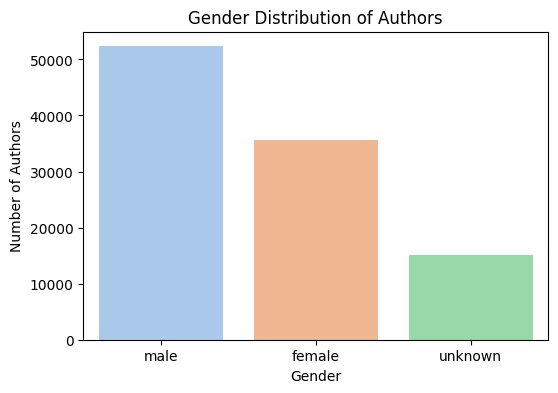

In [83]:
# What is the gender distribution among book authors in the dataset?

import matplotlib.pyplot as plt
import seaborn as sns

# Count gender occurrences
gender_counts = file['Author_Gender'].value_counts()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
plt.title('Gender Distribution of Authors')
plt.ylabel('Number of Authors')
plt.xlabel('Gender')
plt.show()

# Analyze Gender Distribution in Religious vs Secular Books

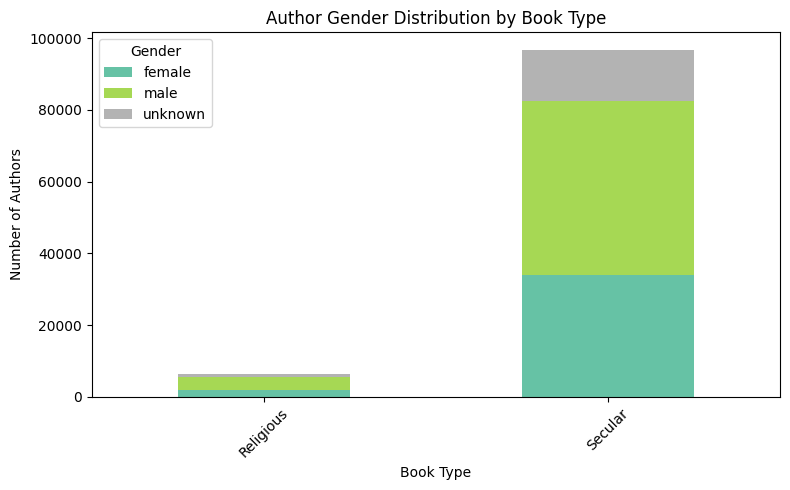

In [90]:
# Crosstab
religion_gender_ct = pd.crosstab(file['Book_Type'], file['Author_Gender'])

# Plot
religion_gender_ct.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Set2')
plt.xticks(rotation=45)
plt.title('Author Gender Distribution by Book Type')
plt.ylabel('Number of Authors')
plt.xlabel('Book Type')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

**Using pie charts to further analyze gender distribution for types of books**

In [181]:
religious_books['Author_Gender'].value_counts()

Author_Gender
male       3734
female     1884
unknown     662
Name: count, dtype: int64

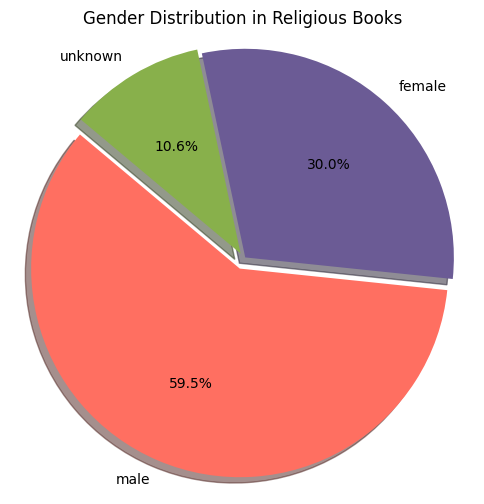

In [196]:
# Filter for religious books
religious_books = file[file['Book_Type'] == 'Religious']

colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']


# Count gender in religious books
religious_gender_counts = religious_books['Author_Gender'].value_counts()

# Plot
plt.figure(figsize=(6,6))
plt.pie(religious_gender_counts, labels=religious_gender_counts.index,
        autopct='%1.1f%%',explode = (0.05,0.01,0.03),shadow=True, startangle=140, colors=colors)
plt.title('Gender Distribution in Religious Books')
plt.axis('equal')
plt.savefig("../Outputs/charts/Gender_Distribution_in_Religious_Books,png",dpi=300)
plt.show()

In [183]:
insights = '''
🧠 Insights (Religious Book Focus):
👨‍🏫 Male authors dominate religious book writing:

Male authors wrote nearly 60% of the religious books in your dataset.

This suggests that men are more prominently represented in authorship of religious content, possibly due to historical, institutional, or cultural influences.

👩‍🎓 Female authors contribute significantly less:

With around 30% of the religious titles, women are underrepresented.

This might reflect gendered norms around religious authority, access, or audience expectations.

❓ Unknown gender authors make up ~11%:

This could be due to missing metadata, the use of initials,publisher omissions or books published by institutions.

Worth investigating if there’s a pattern (e.g., more self-published or certain religious subcategories).
'''

print(insights)


🧠 Insights (Religious Book Focus):
👨‍🏫 Male authors dominate religious book writing:

Male authors wrote nearly 60% of the religious books in your dataset.

This suggests that men are more prominently represented in authorship of religious content, possibly due to historical, institutional, or cultural influences.

👩‍🎓 Female authors contribute significantly less:

With around 30% of the religious titles, women are underrepresented.

This might reflect gendered norms around religious authority, access, or audience expectations.

❓ Unknown gender authors make up ~11%:

This could be due to missing metadata, the use of initials,publisher omissions or books published by institutions.

Worth investigating if there’s a pattern (e.g., more self-published or certain religious subcategories).



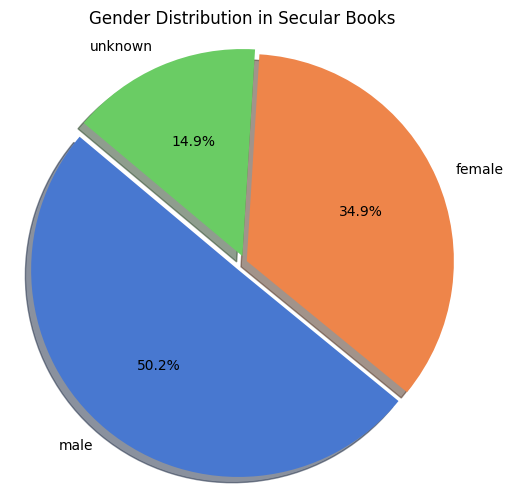

In [195]:
# Filter for secular books
secular_books = file[file['Book_Type'] == 'Secular']

# Count gender in secular books
secular_gender_counts = secular_books['Author_Gender'].value_counts()

# Plot
plt.figure(figsize=(6,6))
plt.pie(secular_gender_counts, labels=secular_gender_counts.index,
        autopct='%1.1f%%',explode = (0.05,0.01,0.03),shadow=True, startangle=140, colors=sns.color_palette('muted'))
plt.title('Gender Distribution in Secular Books')
plt.axis('equal')
plt.savefig("../Outputs/charts/Gender_Distribution_in_Secular_Books.png",dpi=300)
plt.show()

In [185]:
insights = '''🧠 Key Insights:
👨‍💼 Male authors still lead but less dominantly:

Males authored around 51% of secular books, indicating a stronger gender balance compared to religious books.

This suggests greater inclusivity or access for men across a broader range of non-religious themes.

👩‍💻 Female authors have a stronger presence:

At ~36%, female authors are better represented in secular book writing than in religious book categories.

This could imply that women are more active or have more opportunities in general literature, education, or lifestyle content.

❓ High “Unknown” gender proportion:

Roughly 15% of authors have unclassified gender.

This might stem from use of initials, pen names, or incomplete metadata.

It may be helpful to analyze if these “unknowns” follow any pattern (e.g., genre, publication type, etc.).'''


print(insights)

🧠 Key Insights:
👨‍💼 Male authors still lead but less dominantly:

Males authored around 51% of secular books, indicating a stronger gender balance compared to religious books.

This suggests greater inclusivity or access for men across a broader range of non-religious themes.

👩‍💻 Female authors have a stronger presence:

At ~36%, female authors are better represented in secular book writing than in religious book categories.

This could imply that women are more active or have more opportunities in general literature, education, or lifestyle content.

❓ High “Unknown” gender proportion:

Roughly 15% of authors have unclassified gender.

This might stem from use of initials, pen names, or incomplete metadata.

It may be helpful to analyze if these “unknowns” follow any pattern (e.g., genre, publication type, etc.).


**To determine whether there's a relationship between author's gender and book type**

In [109]:
#Contingency table

import pandas as pd
from scipy.stats import chi2_contingency

# Step 1: Create the contingency table
contingency_table = pd.crosstab(file['Book_Type'], file['Author_Gender'])
print(contingency_table)

Author_Gender  female   male  unknown
Book_Type                            
Religious        1884   3736      663
Secular         33826  48586    14387


In [110]:
#Performing the Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 3: Print results
print(f"Chi-square statistic = {chi2:.2f}")
print(f"Degrees of freedom = {dof}")
print(f"P-value = {p:.4f}")

Chi-square statistic = 216.84
Degrees of freedom = 2
P-value = 0.0000


from the above p-value, it can be established that gender distribution varies significantly by book type.

In [111]:
#Checking proportions
pd.crosstab(file['Author_Gender'], file['Book_Type'], normalize='columns') * 100

Book_Type,Religious,Secular
Author_Gender,,
female,29.985676,34.944576
male,59.462040,50.192667
unknown,10.552284,14.862757


In [112]:
insights = '''A chi-square test indicated a significant association between author gender and book type (χ²(2) = 216.84, p < 0.001). Male authors were more likely to write Religious books (59.5%) compared to Secular books (50.2%), while female authors were more likely to write Secular books (34.9%) than Religious books (30.0%). The proportion of authors with unknown gender was also slightly higher among Secular books.
'''

print(insights)

A chi-square test indicated a significant association between author gender and book type (χ²(2) = 216.84, p < 0.001). Male authors were more likely to write Religious books (59.5%) compared to Secular books (50.2%), while female authors were more likely to write Secular books (34.9%) than Religious books (30.0%). The proportion of authors with unknown gender was also slightly higher among Secular books.



In [121]:
# Do male and female authors write about different religious themes?

# Analyzing thematic content vs. gender in religious books

In [113]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns

# nltk downloads (if not already done)
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

#  Filter for religious books with valid descriptions
religious = file[(file['Book_Type'] == 'Religious') & file['Description'].notna()]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\99Street\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [114]:
#Text cleaning function
def clean_text(text):
    tokens = text.lower().translate(str.maketrans('', '', string.punctuation)).split()
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in tokens if word not in stop_words and len(word) > 2])

In [116]:
religious.loc[:,'cleaned_desc'] = religious['Description'].apply(clean_text)

In [118]:
#Separate by gender
male_books = religious[religious['Author_Gender'] == 'male']
female_books = religious[religious['Author_Gender'] == 'female']

In [119]:
#Function to apply LDA and print topics
def lda_topic_modeling(text_data, gender_label, n_topics=5):
    vectorizer = CountVectorizer(max_df=0.9, min_df=5, stop_words='english')
    X = vectorizer.fit_transform(text_data)
    
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(X)
    
    print(f"\n🧾 Top topics for {gender_label} authors:")
    words = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(lda.components_):
        top_words = [words[i] for i in topic.argsort()[-10:]]
        print(f"  Topic {idx+1}: {', '.join(top_words)}")

In [128]:
lda_topic_modeling(male_books['cleaned_desc'], 'Male')
lda_topic_modeling(female_books['cleaned_desc'], 'Female')


🧾 Top topics for Male authors:
  Topic 1: god, questions, historical, christianity, biblical, history, new, bible, jesus, book
  Topic 2: bible, christmas, children, story, love, stories, new, god, book, life
  Topic 3: war, people, islam, faith, religious, god, american, new, life, world
  Topic 4: christ, christian, study, help, spiritual, book, bible, jesus, life, god
  Topic 5: churches, faith, years, life, marriage, religious, people, new, book, church

🧾 Top topics for Female authors:
  Topic 1: hope, beth, true, family, marriage, love, amish, heart, life, god
  Topic 2: study, lives, faith, help, gods, prayer, book, women, life, god
  Topic 3: years, mother, father, god, home, young, family, new, life, love
  Topic 4: christian, prayers, life, church, religious, faith, world, new, spiritual, book
  Topic 5: readers, story, love, life, new, stories, christmas, book, bible, women


In [130]:
male_topics = [
    ['god', 'questions', 'historical', 'christianity', 'biblical', 'history', 'new', 'bible', 'jesus', 'book'],
    ['bible', 'christmas', 'children', 'story', 'love', 'stories', 'new', 'god', 'book', 'life'],
    ['war', 'people', 'islam', 'faith', 'religious', 'god', 'american', 'new', 'life', 'world'],
    ['christ', 'christian', 'study', 'help', 'spiritual', 'book', 'bible', 'jesus', 'life', 'god'],
    ['churches', 'faith', 'years', 'life', 'marriage', 'religious', 'people', 'new', 'book', 'church']
]

female_topics = [
    ['hope', 'beth', 'true', 'family', 'marriage', 'love', 'amish', 'heart', 'life', 'god'],
    ['study', 'lives', 'faith', 'help', 'gods', 'prayer', 'book', 'women', 'life', 'god'],
    ['years', 'mother', 'father', 'god', 'home', 'young', 'family', 'new', 'life', 'love'],
    ['christian', 'prayers', 'life', 'church', 'religious', 'faith', 'world', 'new', 'spiritual', 'book'],
    ['readers', 'story', 'love', 'life', 'new', 'stories', 'christmas', 'book', 'bible', 'women']
]

# visualizing themes by gender

In [122]:
from wordcloud import WordCloud

In [132]:
male_text = ' '.join([word for topic in male_topics for word in topic])
female_text = ' '.join([word for topic in female_topics for word in topic])

In [133]:
# Generate WordClouds
wc_male = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(male_text)
wc_female = WordCloud(width=800, height=400, background_color='white', colormap='Purples').generate(female_text)

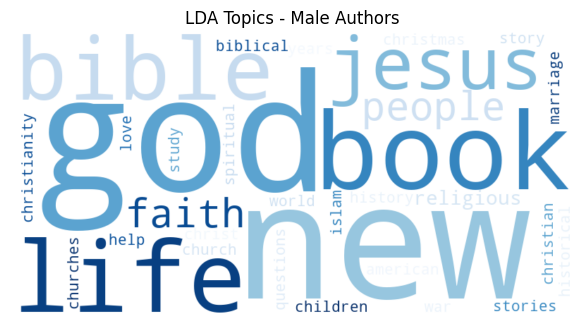

In [194]:
# Plot
plt.figure(figsize=(16, 8))

# Male word cloud
plt.subplot(1, 2, 1)
plt.imshow(wc_male, interpolation='bilinear')
plt.axis('off')
plt.title('LDA Topics - Male Authors')
plt.savefig("../Outputs/charts/Male_Authors.png",dpi=300)
plt.show()

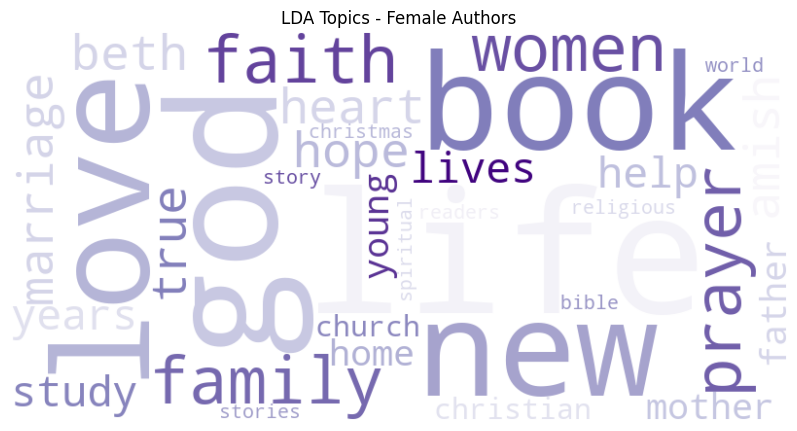

In [197]:
# Female word cloud
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 2)
plt.imshow(wc_female, interpolation='bilinear')
plt.axis('off')
plt.title('LDA Topics - Female Authors')

plt.tight_layout()
plt.savefig("../Outputs/charts/female_Authors.png",dpi=300)
plt.show()

In [187]:
insights = '''🧠 Key Insights:
- Male authors tend to write with a more analytical, historical, or institutional focus, engaging themes like doctrine, geopolitics, and structured study.

- Female authors lean toward relational, emotional, and family-centered content, emphasizing personal faith, love, prayer, and caregiving roles.

- Female-authored topics often directly reference women and domestic life, while male-authored topics are more likely to be impersonal or theological.

- Both genders cover Christianity, the Bible, and faith, but the framing and emotional tone differ markedly.

'''
print(insights)

🧠 Key Insights:
- Male authors tend to write with a more analytical, historical, or institutional focus, engaging themes like doctrine, geopolitics, and structured study.

- Female authors lean toward relational, emotional, and family-centered content, emphasizing personal faith, love, prayer, and caregiving roles.

- Female-authored topics often directly reference women and domestic life, while male-authored topics are more likely to be impersonal or theological.

- Both genders cover Christianity, the Bible, and faith, but the framing and emotional tone differ markedly.




# analyze temporal trends in female author representation in religious publishing 

In [138]:
#Filter for religious books only ---
religious_books = file[(file['Book_Type'] == 'Religious') & (file['Publish_Year'].notna())]

In [140]:
#Group by Year and Gender ---
gender_by_year = religious_books.groupby(['Publish_Year', 'Author_Gender']).size().unstack(fill_value=0)

In [141]:
#Compute % Female Representation per Year ---
gender_by_year['Total'] = gender_by_year.sum(axis=1)
gender_by_year['Female_Percent'] = (gender_by_year.get('female', 0) / gender_by_year['Total']) * 100


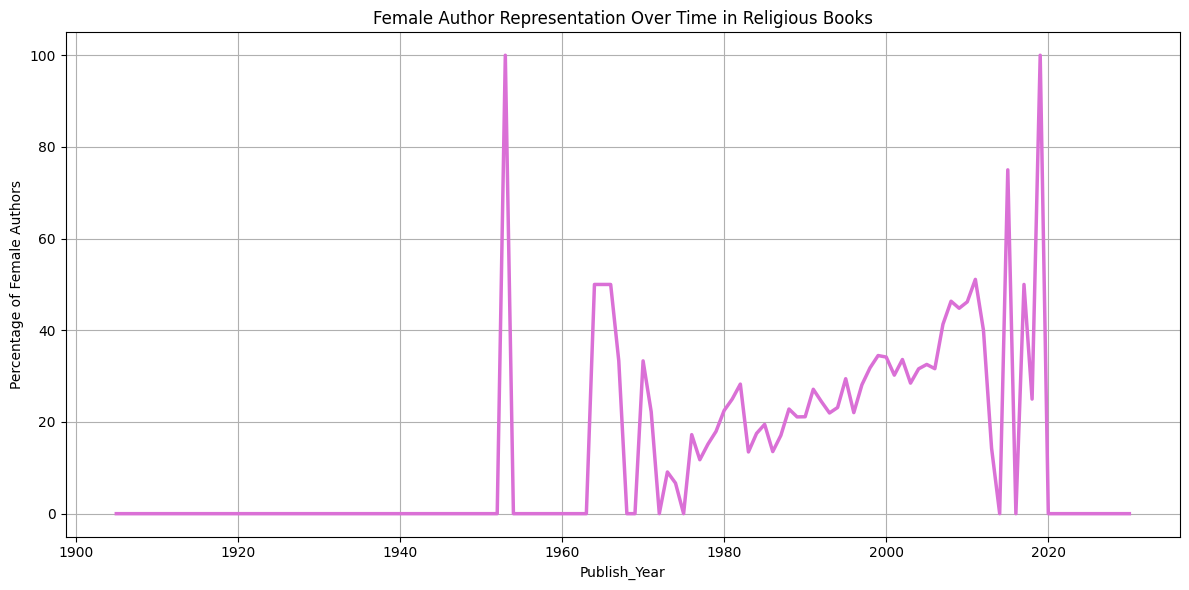

In [198]:
# --- 6. Plot ---
plt.figure(figsize=(12,6))
sns.lineplot(data=gender_by_year, x=gender_by_year.index, y='Female_Percent', color='orchid', linewidth=2.5)
plt.title('Female Author Representation Over Time in Religious Books')
plt.xlabel('Publish_Year')
plt.ylabel('Percentage of Female Authors')
plt.grid(True)
plt.tight_layout()
plt.savefig("../Outputs/charts/Female_Author_Representation_Over_Time_in_Religious_Books.png", dpi=300)
plt.show()

In [190]:
insights = '''- 📈 General Trends
Upward Trend Since the 1970s–1980s: There's a clear increase in the percentage of female authors starting around the 1980s, continuing upward through the 2000s.

Peaks Near 2010–2020: There are sharp spikes approaching 100% around 2010 and 2020, possibly due to smaller sample sizes in those years or outlier publications.

Flat Period (1900–1950s): Female author representation was virtually zero during the first half of the 20th century, which may reflect historical gender barriers in religious publishing.

- ⚠️ Volatility and Spikes
Volatile Pattern: The curve shows noticeable spikes and dips—particularly from 1990 onward. This suggests variability in gender representation in different years or uneven publication counts.

Outliers (100%): Peaks hitting 100% likely indicate years where only female-authored religious books were captured (perhaps due to limited data or edge cases).

- 🧠 Possible Interpretations
Cultural Shifts: The rise of female representation may reflect broader social changes—e.g., feminism, increased access to education, and the rise of genres like Christian romance or devotional literature where women have a strong presence.

Genre Niches: Women may be authoring books in subgenres (e.g., faith-based family narratives or spiritual self-help), contributing to these trends.

'''
print(insights)

- 📈 General Trends
Upward Trend Since the 1970s–1980s: There's a clear increase in the percentage of female authors starting around the 1980s, continuing upward through the 2000s.

Peaks Near 2010–2020: There are sharp spikes approaching 100% around 2010 and 2020, possibly due to smaller sample sizes in those years or outlier publications.

Flat Period (1900–1950s): Female author representation was virtually zero during the first half of the 20th century, which may reflect historical gender barriers in religious publishing.

- ⚠️ Volatility and Spikes
Volatile Pattern: The curve shows noticeable spikes and dips—particularly from 1990 onward. This suggests variability in gender representation in different years or uneven publication counts.

Outliers (100%): Peaks hitting 100% likely indicate years where only female-authored religious books were captured (perhaps due to limited data or edge cases).

- 🧠 Possible Interpretations
Cultural Shifts: The rise of female representation may refl

# Which religious traditions are more likely to have gender-diverse authorship?

In [143]:
religion_keywords = {
    'Christianity': ['bible', 'jesus', 'christ', 'gospel', 'church', 'christianity', 'psalm'],
    'Islam': ['quran', 'koran', 'muhammad', 'hadith', 'islam', 'allah'],
    'Eastern': ['zen', 'buddha', 'buddhism', 'karma', 'dharma', 'tao', 'hindu', 'vedas'],
    'New Age': ['chakra', 'astrology', 'reiki', 'energy', 'crystal', 'spirituality', 'manifest', 'meditation'],
}

In [144]:
#Function to Classify Religion Based on Text
def classify_religious_tradition(row):
    text = f"{row.get('Category', '')} {row.get('Description', '')}".lower()
    for tradition, keywords in religion_keywords.items():
        if any(keyword in text for keyword in keywords):
            return tradition
    return 'Other'  # If no match found

In [145]:
#Applying to data frame

file['Religion_Tradition'] = file.apply(classify_religious_tradition, axis=1)

In [152]:
file['Religion_Tradition'].unique()

array(['Other', 'Christianity', 'Eastern', 'New Age', 'Islam'],
      dtype=object)

In [153]:
#Gender distribution per category

# Count of each gender within each religion
tradition_gender_ct = pd.crosstab(file['Religion_Tradition'], file['Author_Gender'])

# Add total per tradition for ordering or % conversion
tradition_gender_ct['Total'] = tradition_gender_ct.sum(axis=1)

# Optional: Sort by size
tradition_gender_ct = tradition_gender_ct.sort_values('Total', ascending=False)
tradition_gender_ct

Author_Gender,female,male,unknown,Total
Religion_Tradition,,,,
Other,31859,45838,13950,91647
Christianity,2463,4009,696,7168
Eastern,724,1310,220,2254
New Age,592,926,147,1665
Islam,72,239,37,348


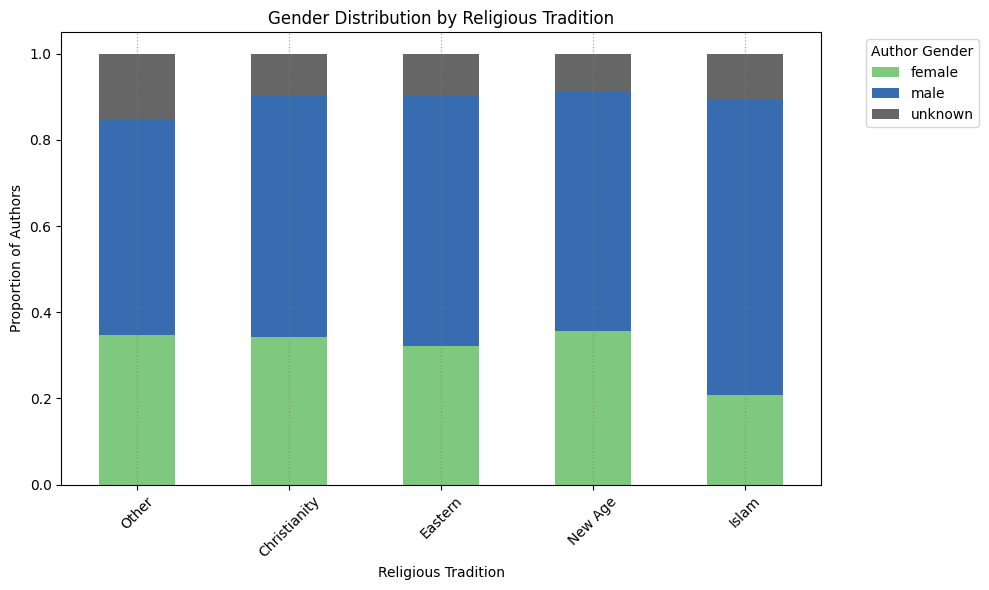

In [199]:
#Stacked Bar Chart of Gender Proportion

import matplotlib.pyplot as plt
import seaborn as sns

# Normalize to percentages
tradition_gender_prop = tradition_gender_ct.div(tradition_gender_ct['Total'], axis=0)

# Drop 'Total' for plotting
tradition_gender_prop = tradition_gender_prop.drop(columns='Total')

# Plot
tradition_gender_prop.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Accent')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle=':', # Line style (e.g., '-', '--', '-.', ':')
    linewidth=0.9,        # Thickness of grid lines
    color='gray',         # Grid color
    alpha=0.7)
plt.title('Gender Distribution by Religious Tradition')
plt.ylabel('Proportion of Authors')
plt.xlabel('Religious Tradition')
plt.legend(title='Author Gender', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig("../Outputs/charts/Authors_gender.png",dpi=300)
plt.show()

🔍 Gender Diversity in Religious Publishing by Tradition
| Religion Tradition | Female | Male   | Unknown | Total  |
| ------------------ | ------ | ------ | ------- | ------ |
| **Other**          | 31,859 | 45,838 | 13,950  | 91,647 |
| **Christianity**   | 2,463  | 4,009  | 696     | 7,168  |
| **Eastern**        | 724    | 1,310  | 220     | 2,254  |
| **New Age**        | 592    | 926    | 147     | 1,665  |
| **Islam**          | 72     | 239    | 37      | 348    |

📌 Key Insights
1. Overall Gender Imbalance
- Male authors are the majority across all traditions.

- Female authors are consistently underrepresented.
| Tradition        | Female % |
| ---------------- | -------- |
| **New Age**      | \~35.6%  |
| **Christianity** | \~34.4%  |
| **Other**        | \~34.8%  |
| **Eastern**      | \~32.1%  |
| **Islam**        | \~20.7%  |

🔼 New Age has the highest proportion of female authors.

🔽 Islam has the lowest female representation.

👀 The “Other” category — representing unclassified or mixed religion books — has the highest total volume and a moderately balanced gender mix.

📌 Conclusion
- Gender diversity in religious authorship varies significantly by tradition.

- New Age and Eastern religious publishing are more gender-inclusive.

- Islamic and Christian traditions are more male-dominated, though Christianity shows a moderate share of female authorship.

- Interpretation should consider sample sizes and the presence of unknown genders.

## Are women writing more low-cost, independent, or self-published religious books?
## Do major publishers disproportionately publish books by men?

In [ ]:
 # 📉 Compare Average Price by Gender

In [163]:
# Drop null prices and filter for positive values
file_price = file[file['Cleaned_Price'].notna() & (file['Cleaned_Price'] > 0)]

# Group by Author Gender
avg_price_gender = file_price.groupby('Author_Gender')['Cleaned_Price'].agg(['mean', 'median', 'count']).round(2)
avg_price_gender

,mean,median,count
Author_Gender,,,
female,6.32,5.29,35710
male,6.96,5.29,52322
unknown,7.17,5.29,15050


In [164]:
# 🏷 Identify Independent/Self Publishers (Simple Heuristic)

In [165]:
# Convert to lowercase for uniformity
file['Publisher_Lower'] = file['Publisher'].str.lower()

In [166]:
# Simple heuristic: self/indie publishers often include these terms
indie_keywords = ['independent', 'self-published', 'createspace', 'authorhouse', 'lulu', 'xulon', 'trafford']

def is_indie_publisher(publisher):
    if pd.isna(publisher): return False
    return any(kw in publisher for kw in indie_keywords)

In [167]:
file['Is_Indie'] = file['Publisher_Lower'].apply(is_indie_publisher)

In [168]:
 # 📊 Gender Distribution Among Indie vs. Traditional Publishers

In [171]:
# Crosstab to show gender distribution in indie vs non-indie publishers
publisher_gender_ct = pd.crosstab(file['Is_Indie'], file['Author_Gender'], normalize='index').round(3) * 100
publisher_gender_ct

Author_Gender,female,male,unknown
Is_Indie,,,
False,34.6,50.8,14.6
True,34.0,47.2,18.9


In [ ]:
 # 📉 Compare Price by Gender and Publisher Type

In [173]:
# Group and summarize
price_summary = file.groupby(['Author_Gender', 'Is_Indie'])['Cleaned_Price'].agg(['mean', 'median', 'count']).round(2)
price_summary

mean  median  count
Author_Gender Is_Indie                     
female        False     6.31    5.29  35692
              True      9.69    7.22     18
male          False     6.96    5.29  52297
              True      9.69    6.71     25
unknown       False     7.17    5.29  15040
              True      7.80    5.70     10

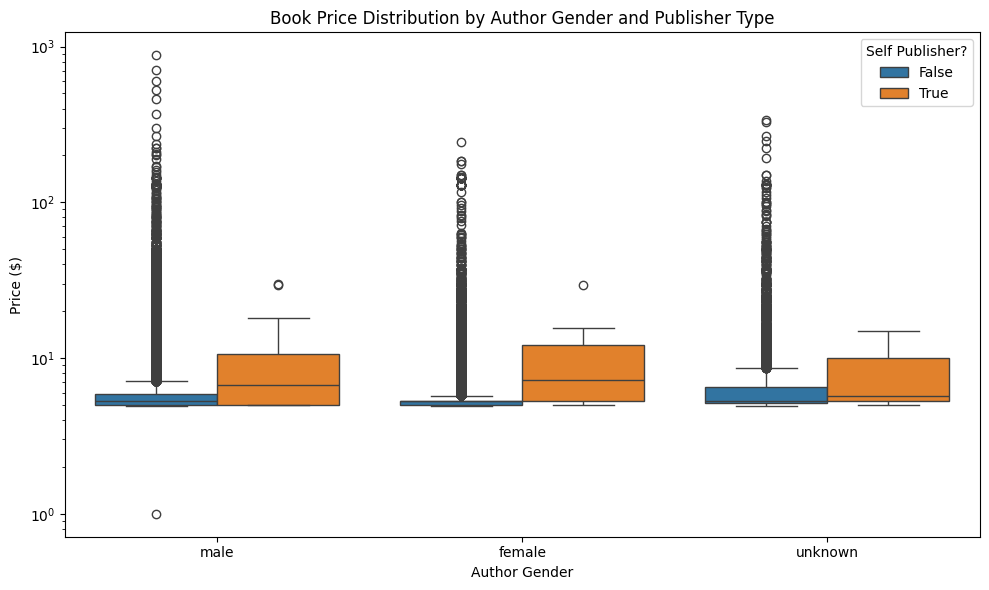

In [200]:
# Boxplot of Price by Gender and Publisher Type
plt.figure(figsize=(10,6))
sns.boxplot(data=file, x='Author_Gender', y='Cleaned_Price', hue='Is_Indie')
plt.title("Book Price Distribution by Author Gender and Publisher Type")
plt.ylabel("Price ($)")
plt.xlabel("Author Gender")
plt.legend(title='Self Publisher?')
plt.yscale('log')  # Optional if prices have long tail
plt.tight_layout()
plt.savefig("../Outputs/charts/Gender_publishertype.png",dpi=300)
plt.show()

In [191]:
insights = '''💡 Key Insights
1. 🟩 Indie Books Are More Expensive, Regardless of Gender
Across all genders, indie-published books have a significantly higher mean and median price.

Indie Mean: ~$9.69 vs. Traditional Mean: ~$6.31–7.17

Suggests indie authors may price higher to recover costs or target niche audiences.

2. 🟦 Women and Men Have Identical Indie Mean Prices
Female and Male indie authors both average $9.69 per book.

This suggests no significant pricing difference between genders within the indie space.

3. 🟥 Male Authors Are More Represented in Traditional Publishing
Count:

Male Traditional: 52,297 books

Female Traditional: 35,692 books

Indicates men dominate traditionally published religious books, potentially due to:

Gender bias in publishing

Institutional gatekeeping

Topic preferences

4. 🟨 Female Indie Authors Have Slightly Higher Median Prices
Female Indie Median: $7.22

Male Indie Median: $6.71

While based on small samples (only 18 female indie authors), this could reflect:

Women leveraging niche pricing strategies

Possibly targeting specialized religious/spiritual audiences

5. ⚠️ Sample Size for Indie is Very Small
Only 53 indie books in total (18 female, 25 male, 10 unknown).

While indicative, these figures should be treated with caution and may not generalize.

📌Summary
"Women are underrepresented in traditional religious publishing, but when they do self-publish, they price their books as competitively (or higher) than men. Indie publishing appears to offer both genders a route to price higher, but adoption is low across the board."'''
print(insights)

💡 Key Insights
1. 🟩 Indie Books Are More Expensive, Regardless of Gender
Across all genders, indie-published books have a significantly higher mean and median price.

Indie Mean: ~$9.69 vs. Traditional Mean: ~$6.31–7.17

Suggests indie authors may price higher to recover costs or target niche audiences.

2. 🟦 Women and Men Have Identical Indie Mean Prices
Female and Male indie authors both average $9.69 per book.

This suggests no significant pricing difference between genders within the indie space.

3. 🟥 Male Authors Are More Represented in Traditional Publishing
Count:

Male Traditional: 52,297 books

Female Traditional: 35,692 books

Indicates men dominate traditionally published religious books, potentially due to:

Gender bias in publishing

Institutional gatekeeping

Topic preferences

4. 🟨 Female Indie Authors Have Slightly Higher Median Prices
Female Indie Median: $7.22

Male Indie Median: $6.71

While based on small samples (only 18 female indie authors), this could reflect:
